DataSet: [https://www.kaggle.com/ruthgn/wine-quality-data-set-red-white-wine](https://www.kaggle.com/ruthgn/wine-quality-data-set-red-white-wine)

Целевая переменная - "quality"

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split

In [2]:
path = 'wine-quality-white-and-red.csv'
data = pd.read_csv(path)
data_copy = data.copy()

In [3]:
data.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# Гистограммы

Выбросов в районе нуля не видно. Вероятно, все данные определены.

Целевая переменная - категориальная, параметры - непрерывные.

На многих графиках присутствуют пустотные места, например, на графике `citric acid` больше 0.85. Вероятно, там есть выбросы.

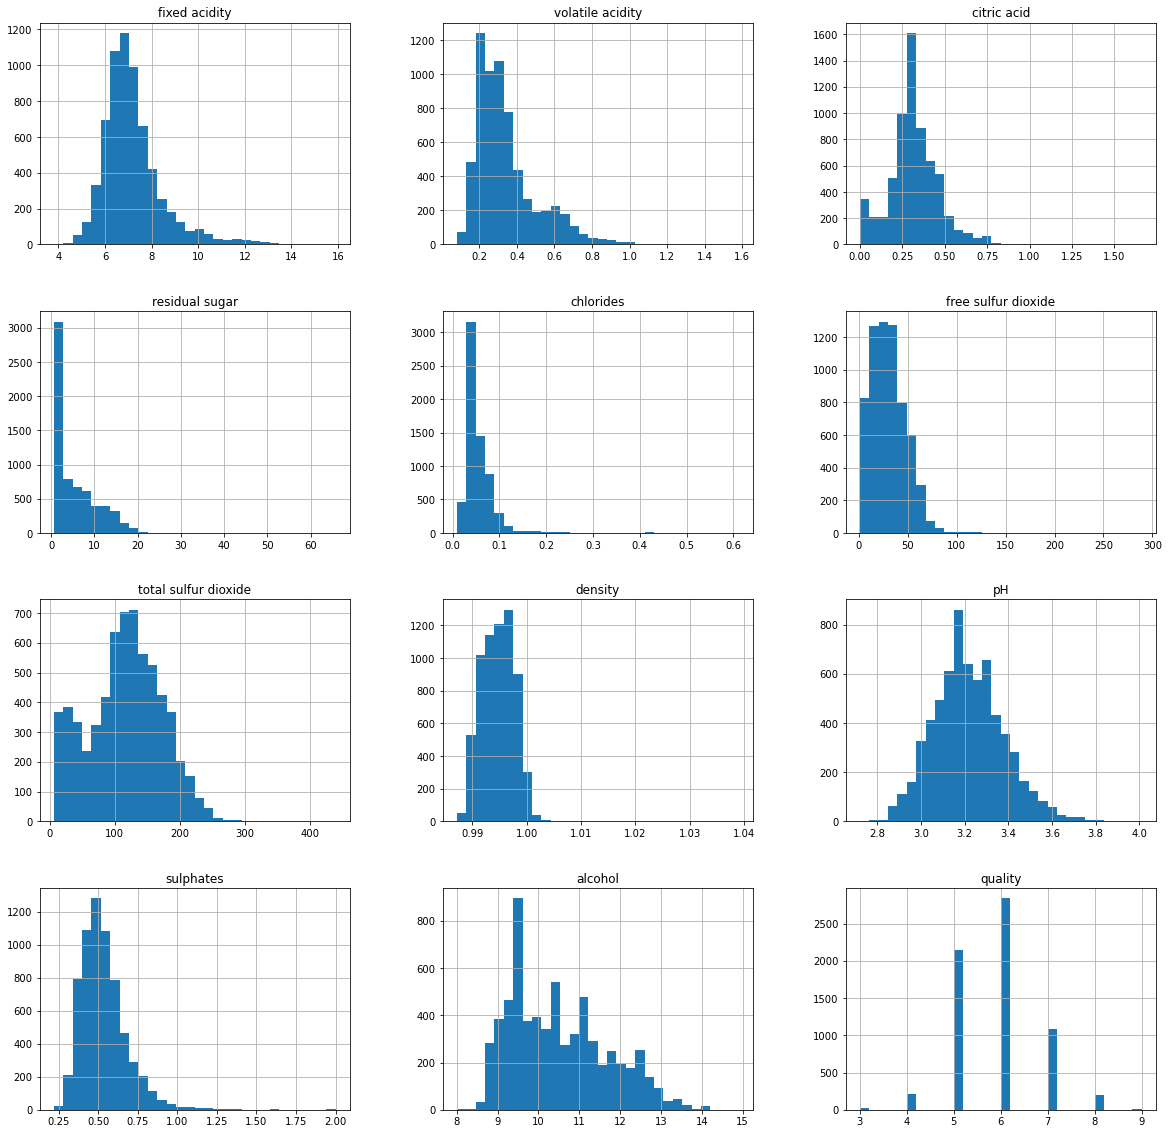

In [4]:
data.hist(figsize=(20, 20), bins=30);

# Пытаемся найти выбросы по гистограммам

In [5]:
data = data_copy.copy()

## Остаточный сахар
Не смотря на то, что значения остаточного сахара меньше 1 редки, оставляем, т.к. их не мало, и на выбросы они не похожи.
Значения больше 30 считаем выбросами.

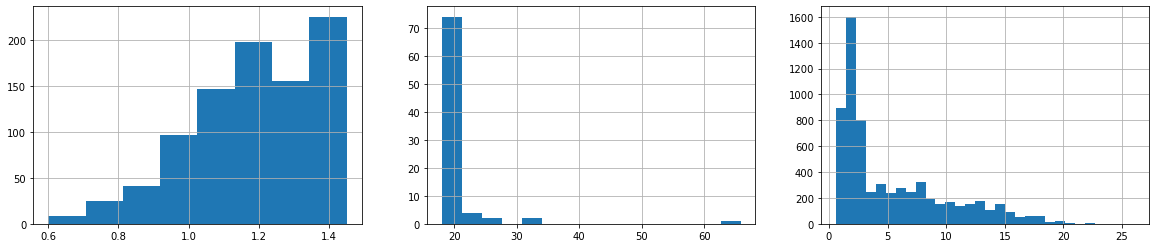

In [6]:
_, ax = plt.subplots(1, 3, figsize=(20, 4))
data[data['residual sugar'] < 1.5]['residual sugar'].hist(bins=8, ax=ax[0])
data[data['residual sugar'] > 18]['residual sugar'].hist(bins=15, ax=ax[1])
data = data.drop(data[data['residual sugar'] > 30].index)
data['residual sugar'].hist(bins=30, ax=ax[2]);

## Свободный диоксид серы

Считаем выбросами значения больше 200.

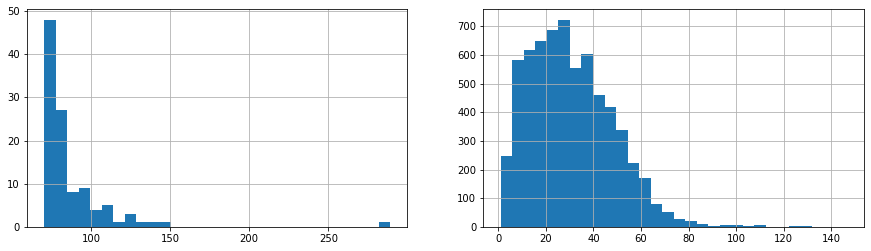

In [7]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))
data[data['free sulfur dioxide'] > 70]['free sulfur dioxide'].hist(bins=30, ax=ax[0])
data = data.drop(data[data['free sulfur dioxide'] > 200].index)
data['free sulfur dioxide'].hist(bins=30, ax=ax[1]);

## Лимонная кислота

Считаем выбросами значения больше 0.9.

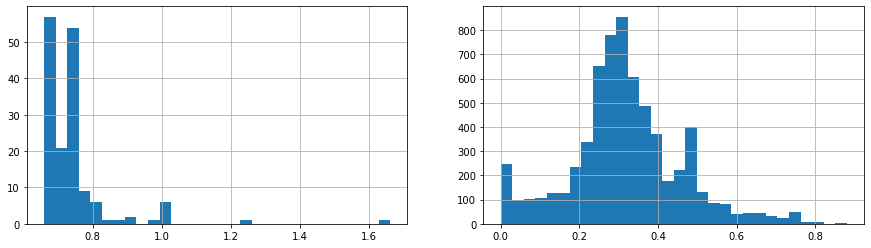

In [8]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))
data[data['citric acid'] > 0.65]['citric acid'].hist(bins=30, ax=ax[0])
data = data.drop(data[data['citric acid'] > 0.9].index)
data['citric acid'].hist(bins=30, ax=ax[1]);

## Хлориды

Думаю, можно посчитать значение около 0.6 выбросом, с остальными не понятно.


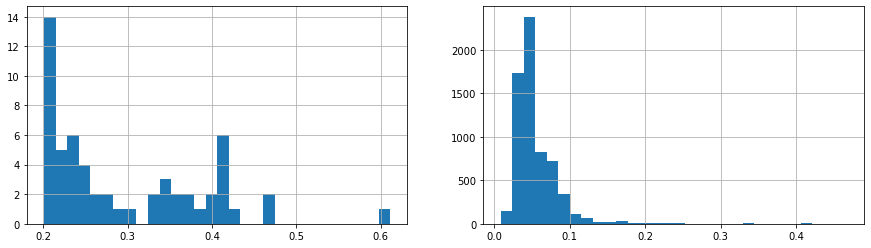

In [9]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))
data[data['chlorides'] > 0.2]['chlorides'].hist(bins=30, ax=ax[0])
data = data.drop(data[data['chlorides'] > 0.55].index)
data['chlorides'].hist(bins=30, ax=ax[1]);

## Сульфаты

Считаем значения около 2 выбросами.

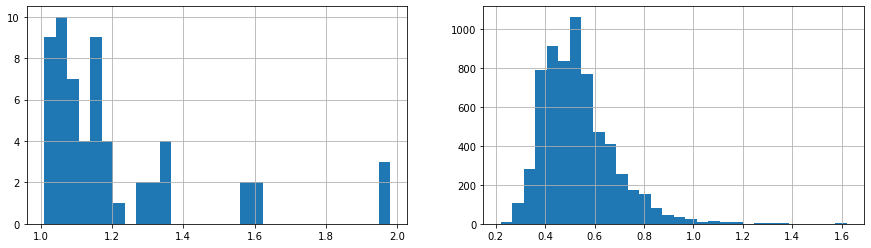

In [10]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))
data[data['sulphates'] > 1]['sulphates'].hist(bins=30, ax=ax[0])
data = data.drop(data[data['sulphates'] > 1.8].index)
data['sulphates'].hist(bins=30, ax=ax[1]);

## СКО Хлоридов

Точки `(quality=7, chlorides~0.35)` и `(quality=4, chlorides~0.3)` похожи на выбросы.

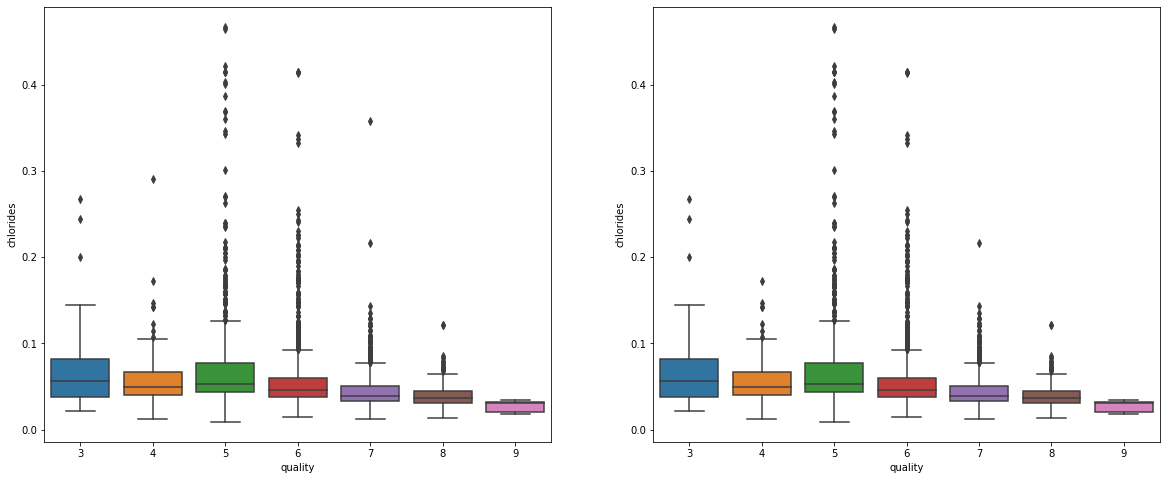

In [11]:
_, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(data=data, x='quality', y='chlorides', ax=ax[0])
data = data.drop(data[(data['quality'] == 7) & (data['chlorides'] > 0.3)].index)
data = data.drop(data[(data['quality'] == 4) & (data['chlorides'] > 0.25)].index)
sns.boxplot(data=data, x='quality', y='chlorides', ax=ax[1]);

# Пропущенные значения

Все значения определены.

In [12]:
nulls_counts = data.isnull().sum()
nulls_counts

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Корреляция

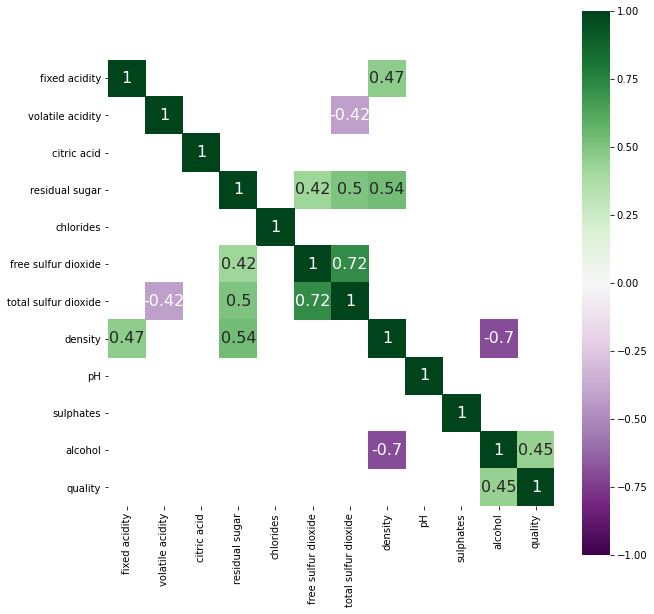

In [13]:
corr_table = data.corr()
_, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_table[(corr_table <= -0.4) | (corr_table >= 0.4)],
            square=True, vmin=-1, vmax=1, cmap='PRGn', ax=ax,
            annot=True,
            annot_kws={'size': 16});

Посмотрим на 2 наиболее коррелированные пары величин:
- Свободный диоксид серы и Общий диоксид серы коррелированы по понятной причине - Общий включает в себя Свободный.
- Плотность и Алкоголь

Добавим поле для связанного диоксида серы

In [14]:
data['bound sulfur dioxide'] = data['total sulfur dioxide'] - data['free sulfur dioxide']
data = data[['type', 'fixed acidity', 'volatile acidity', 'citric acid',
             'residual sugar', 'chlorides', 'free sulfur dioxide', 'bound sulfur dioxide',
             'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]

Из графика зависимости алкоголя и плотности видно, что есть сильно выраженная нижняя граница алкоголя при низкой плотности.
Еще при `(alcohol~15, density~0.997)` похоже есть выброс.

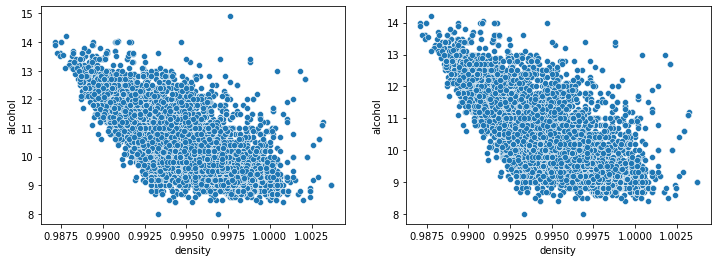

In [15]:
_, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=data, x='density', y='alcohol', ax=ax[0])
data = data.drop(data[(data['alcohol'] > 14) & (data['density'] > 0.996)].index)
sns.scatterplot(data=data, x='density', y='alcohol', ax=ax[1]);

# Гистограммы после чистки

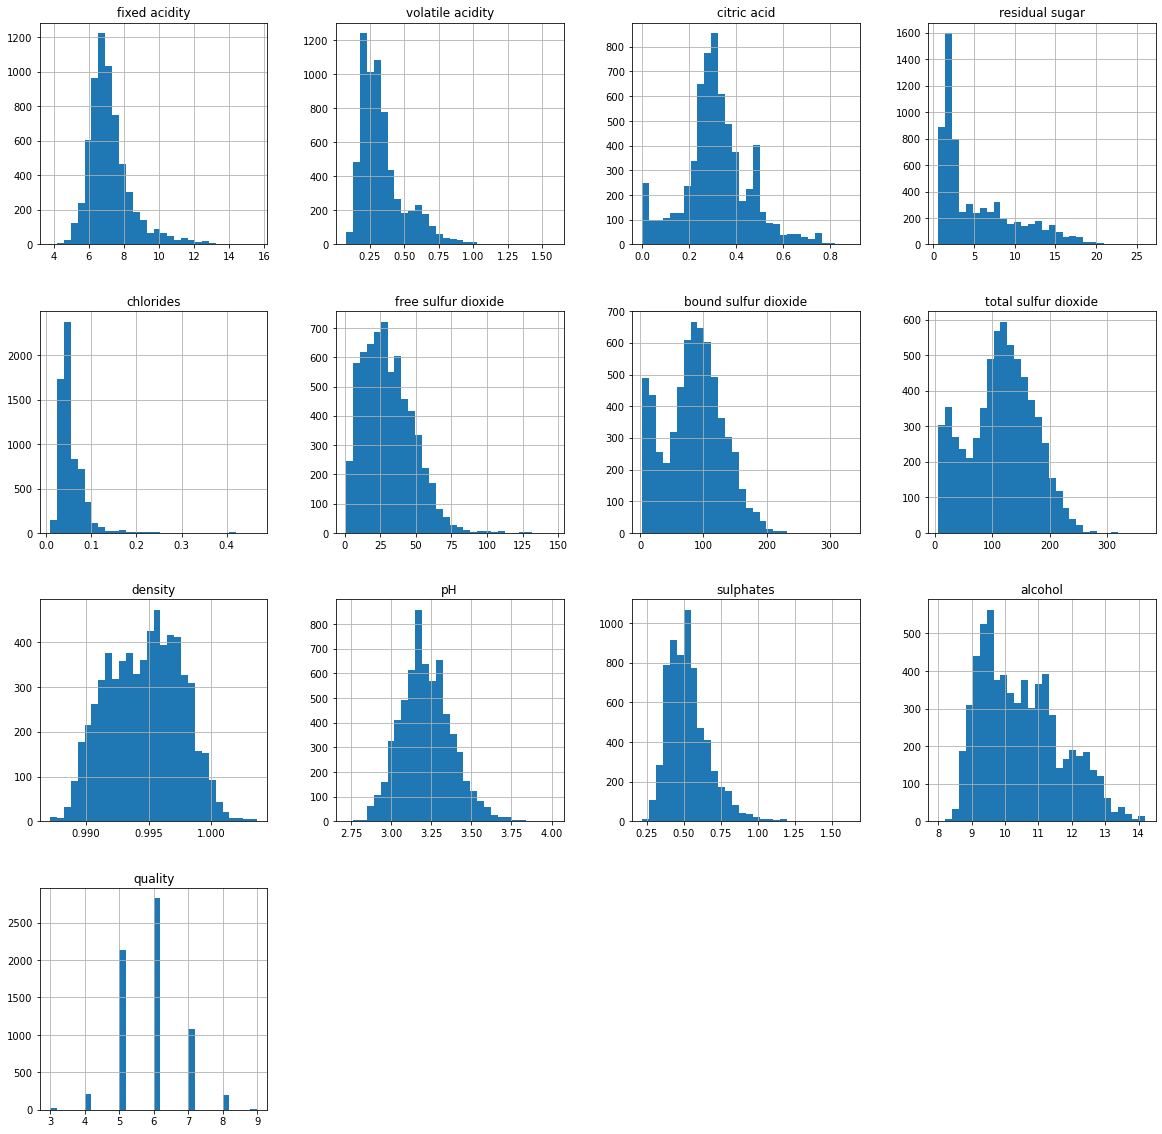

In [16]:
data.hist(figsize=(20, 20), bins=30);

# Смещение

Смещения всех значений

In [17]:
numeric_index = data.dtypes[data.dtypes != 'object'].index

all_skewness = data[numeric_index]\
    .apply(lambda x: stats.skew(x))\
    .sort_values(ascending=False)\
    .rename('skewness')
all_skewness = pd.DataFrame(all_skewness)
all_skewness

,skewness
chlorides,4.727710
fixed acidity,1.700040
volatile acidity,1.494799
sulphates,1.362492
residual sugar,1.134799
free sulfur dioxide,0.791057
alcohol,0.562258
pH,0.391979
citric acid,0.216307
quality,0.195266


Наиболее смещенные значения.
Определим коэффициенты лямбда для преобразования.

In [18]:
skewness = all_skewness[abs(all_skewness['skewness']) > 0.75].copy()
skewness['lambda'] = [-20, -1, -3, -2, 0.1, 0.5]
skewness

,skewness,lambda
chlorides,4.727710,-20.0
fixed acidity,1.700040,-1.0
volatile acidity,1.494799,-3.0
sulphates,1.362492,-2.0
residual sugar,1.134799,0.1
free sulfur dioxide,0.791057,0.5


Преобразуем

In [19]:
data_after_transform = data.copy()
for i in skewness.index:
    data_after_transform[i] = boxcox1p(data[i], skewness.at[i, 'lambda'])

Смещенности после преобразования

In [20]:
data_after_transform[numeric_index]\
    .apply(lambda x: x.skew())\
    .sort_values(ascending=False)

alcohol                 0.562388
residual sugar          0.472620
pH                      0.392070
chlorides               0.364209
fixed acidity           0.327062
volatile acidity        0.321681
sulphates               0.263815
citric acid             0.216357
quality                 0.195311
bound sulfur dioxide    0.098948
free sulfur dioxide     0.015140
density                -0.024512
total sulfur dioxide   -0.029264
dtype: float64

# Гистограммы после преобразования

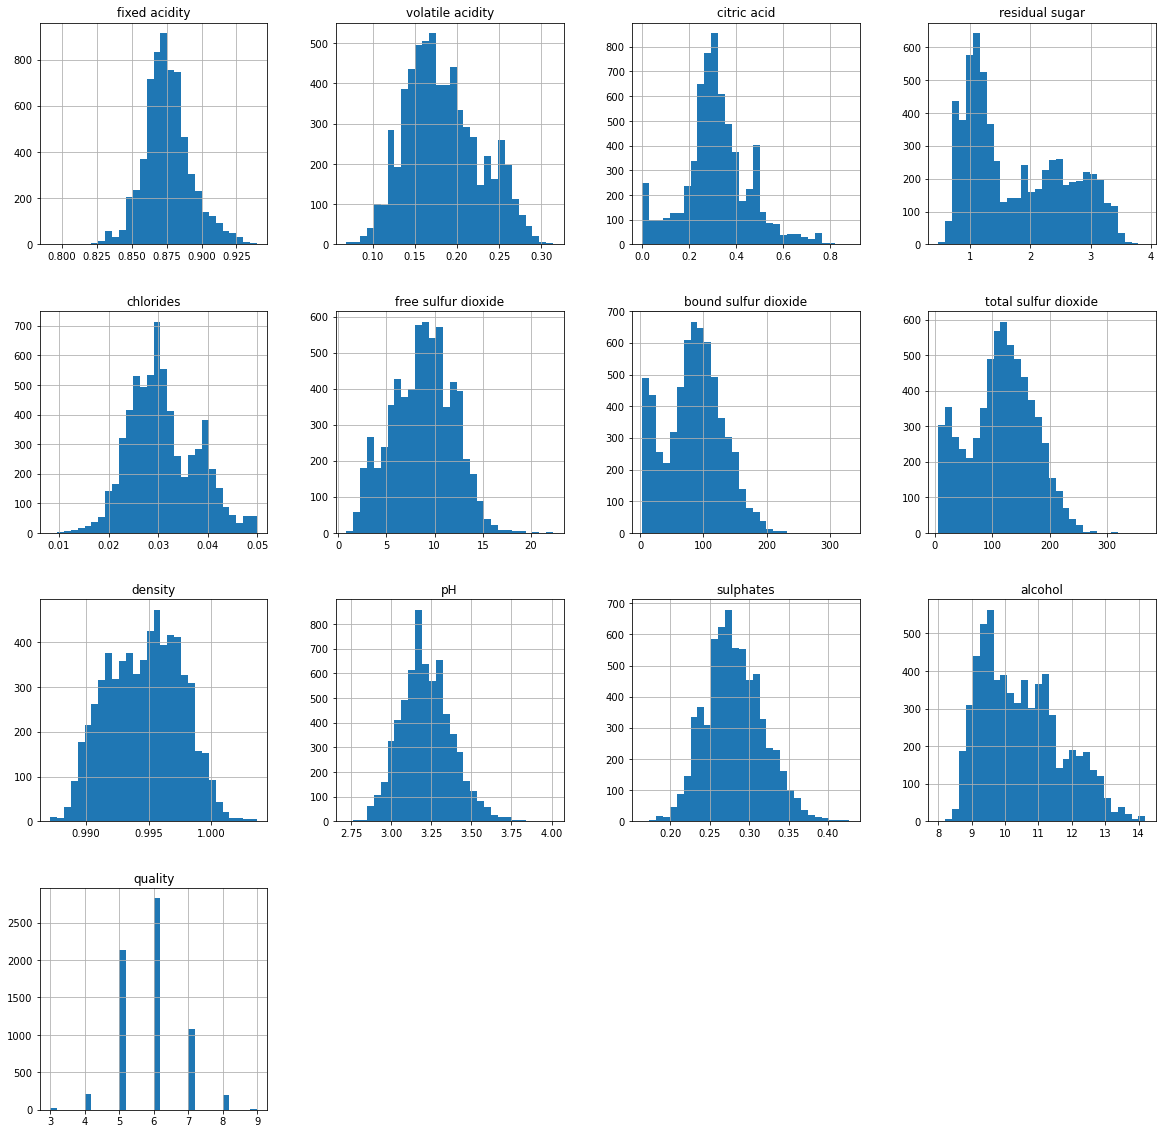

In [21]:
data_after_transform.hist(figsize=(20, 20), bins=30);

# Попарные зависимости

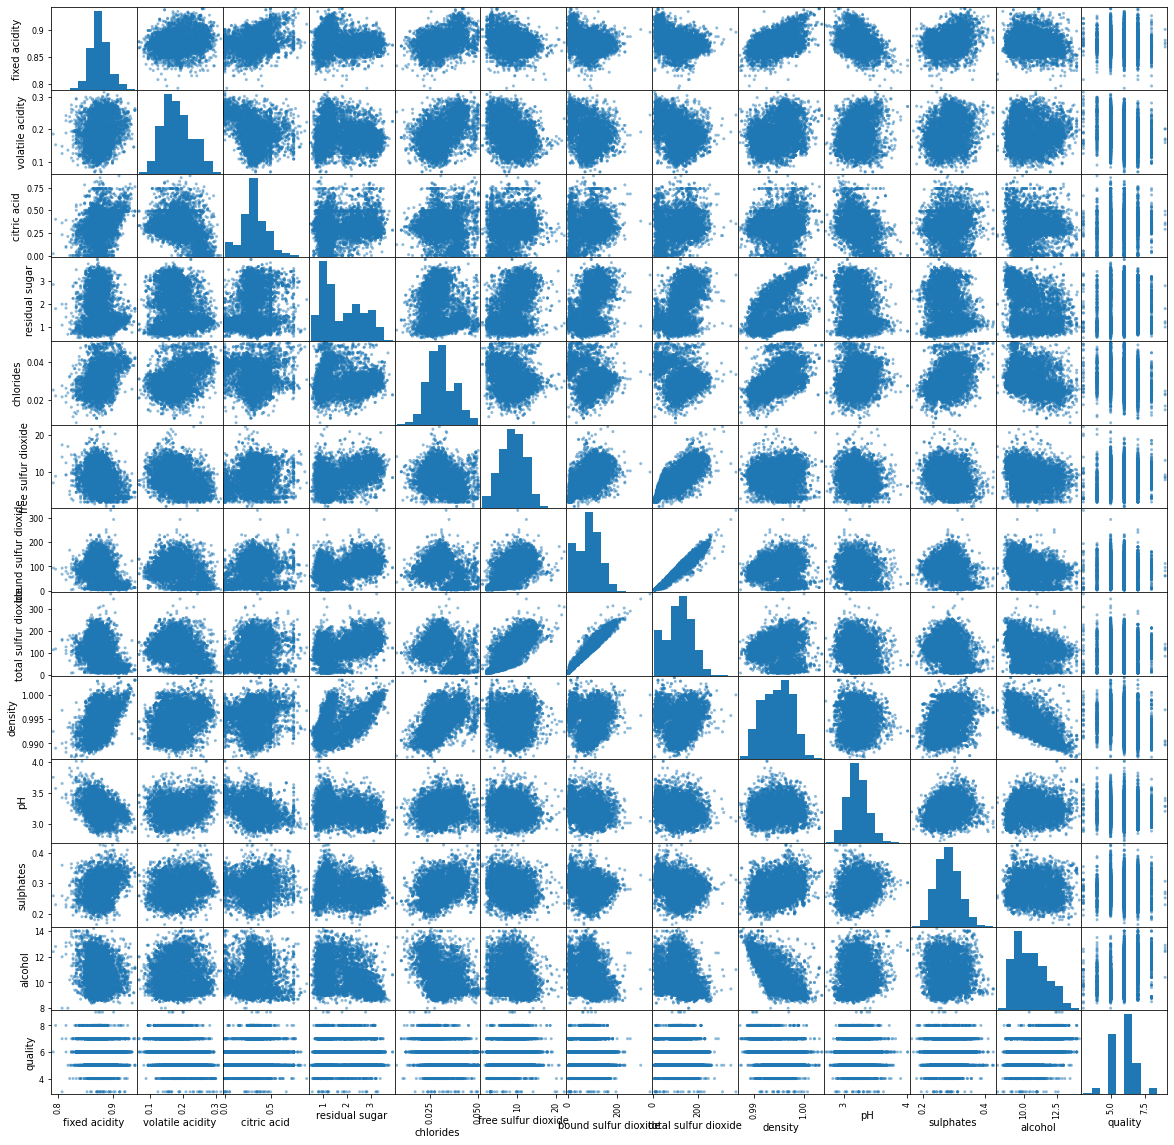

In [22]:
pd.plotting.scatter_matrix(data_after_transform, figsize=(20, 20));

# Разделение на тренировочные и тестовые данные

In [23]:
train, test = train_test_split(data_after_transform, test_size=0.3)
train.shape, test.shape

((4532, 14), (1943, 14))